# Data Science Unit 3: Machine Learning Assessment 3 - Mini Major Project
## By Ruhan Shafi

## Project Goal: 
The goal of this project is to create an image recognition model that can successfully identify a person’s biological sex and whether they are a minor or an adult with high accuracy. This will be achieved by creating a dense deep-learning neural network using the Tensorflow Keras Library and training it using the publicly available and open-source All Age Faces Dataset published by Tsinghua University.



---



# Downloading and Importing Libraries

This is a command line session that is responsible for downloading any python libraries required for the project that are not native to the google collaborative IDE.

This section of the code is responsible for initiating the Tensorflow environment and for importing all the libraries into the IDE.

In [1]:
#IMPORTING TENSORFLOW LIBRAIES
#%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf
import tensorflow.compat.v2.feature_column as fc
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras.models import Sequential

#IMPORTING PANDAS & RELATED LIBRAIES
import pandas as pd # pandas is a library for data processing
import numpy as np # numpy is a library for numerical analysis
import statistics

#IMPORTING VISULIZATION LIBRAIES
import matplotlib.pyplot as plt # Matplotlib is a engine that is used to generate visualisation from data
import matplotlib as mpl 
import mplcatppuccin # This is a visual modifier desgined to make visualizations use the Catppuccin colour scheme, (so just make things look more pretty)
import seaborn as sns # seaborn is a visualisation wrapper for matplotlib 
sns.set_theme(style="darkgrid") # To make visualizations more unified
mpl.style.use("mocha") # To make visulizations more unified with my IDE
from IPython.display import clear_output
from __future__ import absolute_import, division, print_function, unicode_literals
from IPython.display import display, HTML

#IMPORTING BACKEND LIBRAIES
import datetime # datetime enables us to handle date and time data numerically
import random
import functools
from multiprocessing import Pool
from multiprocessing.dummy import Pool as ThreadPool
from six.moves import urllib
import os
import re
import shutil
import string
import pathlib
import PIL
import PIL.Image

2023-06-26 10:02:46.127177: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-26 10:02:46.264561: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-26 10:02:46.267090: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-26 10:02:47.361970: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Downloading Data

This section of the code is responsible for downloading and extracting the raw data using the keras utility which is saved unto the Linux envoirment that google collab uses. The last command acts as an allias instade of having to use the linux file system. The dataset in question is the **`All-Age-Faces Dataset`** hosted by **Tsinghua Science and Technology**

In [2]:
url = 'https://github.com/RuhanShafi/DS2023_A3_SPLIT/raw/main/Original_faces_catgorized.tgz'

#THIS CODE WORKS ONLY ON NOTEBOOK, BUT THE CODE BELOW WORKS UNIVERSAL SO YOU DO THE MATHS ON WHICH IS BETTER!

#dataset = tf.keras.utils.get_file(origin=url, extract=True, cache_dir='.',cache_subdir='')
dataset = tf.keras.utils.get_file(origin=url, extract=True)
data_dir = pathlib.Path(dataset).with_suffix('')
dataset_dir = os.path.join(os.path.dirname(dataset), 'Original_faces_catgorized')

This section of the code is the tensorflow equivlent of the `ls` command since the os.path.join fucion has been used to create a link 

In [3]:
os.listdir(dataset_dir)


['Catgories.txt', 'Man', 'Boys', 'Woman', 'Girls']

In [4]:
#image_count = len(list(train_dir.glob('*/*.jpg')))
#print(image_count)

# Preprossing the Data

This section of code is responsible for defining some parameters for the loader that will be used for the construction of the model. The reason why these parameters have been used is in order to ensure that Virtual Envoirment does not run out of RAM during the training process.

In [5]:
batch_size = 32
img_height = 180
img_width = 180

This next two sections of code is reponsible for multiple things all relating to the creation of the training model. First, it identifies the different classes that this model will learn and later regonize. This is done by creating a class for each folder present in the dataset file.

The next step that this code does is split the dataset into 3 parts, that being the following


*   Training Dataset (60% of the original dataset)
*   Validation Dataset (20% of the original dataset)
*   Testing Dataset (20% of the original dataset)

Finally, the different datasets are loaded into the keras enviorment with the defined parametrs from the code above. 

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 13322 files belonging to 4 classes.
Using 10658 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 13322 files belonging to 4 classes.
Using 2664 files for validation.


This section of code is responisble for defining & declearing the different catergories to the keras enviorment.

In [8]:
class_names = train_ds.class_names
print(class_names)

['Boys', 'Girls', 'Man', 'Woman']


This section of code is responsible for visualisng the dataset in order to get an idea of what the data looks like & to check if there is any large amount of courrption present with the dataset as a large.

2023-06-26 10:02:53.279211: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10658]
	 [[{{node Placeholder/_0}}]]
2023-06-26 10:02:53.279466: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [10658]
	 [[{{node Placeholder/_4}}]]


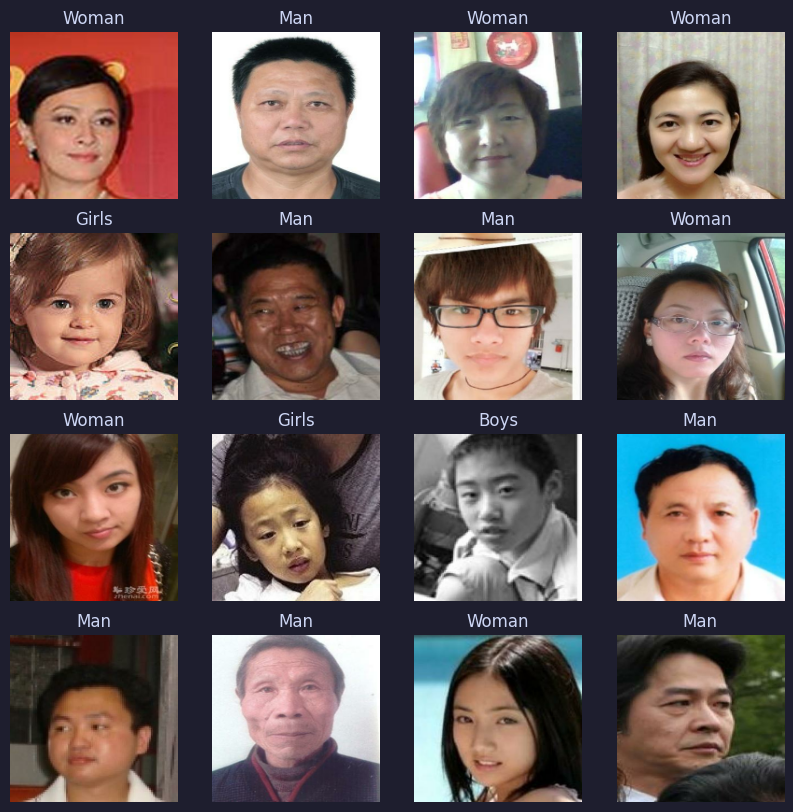

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

This section of the code is responsible for passing the dataset onto the Keras `Model.fit` method. The `image_batch` is a tensor that consits of the following values.

1.   The Batch Size (This is also the same value as the `labels_batch` shape
2.   The Dimesion of the image
3.   The amount of colour channels present in this image (since the RGB channel is being used, the value should be 3)


In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


2023-06-26 10:02:55.179338: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [10658]
	 [[{{node Placeholder/_4}}]]
2023-06-26 10:02:55.179884: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10658]
	 [[{{node Placeholder/_0}}]]


## Configuring the dataset from increased performance

This section of code is responsible for the application of the following two functions of the dataset. This is done to ensure that during the training process, when the datasets are fed into the model the `I/O` isn't blocked, this has the positive benefits of reducing system load and speeding up the training process exponentially.

The purpose of the `.cache()` function is to keep data loaded into the Tensorflow VM's memory after it's loaded of the disk. This is done in order to make the recall of the data far easier & faster. This is easily helpful during the evaluation process that occurs after each epoch.
If the dataset is too large to fit into memory, then this method  creates a performant on-disk cache, which is more efficient to read than many small files, this is akin to a swap partiation on linux, where addtional memory is storted tempoararly on the disk when memory is full.

The purpose of the `.prefetch()` function is to allow for the overlapping of  data preprocessing and model execution while training. This inturn dramaticlly speeds up the training process.

Addtionally, the `.shuffle()` function randomly shuffles the data around in order to remove training bias since the data was previously ordered sequentially.

In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Standardizing the dataset

This section of code is responsible for scaling the RGB channel values for each pixel from `[0,255]` to `[0,1]`. This makes training the model easier since the matrix multiplication calucations returns far easier numbers to work with.

In [12]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

2023-06-26 10:02:55.369060: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [10658]
	 [[{{node Placeholder/_4}}]]
2023-06-26 10:02:55.369484: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10658]
	 [[{{node Placeholder/_0}}]]


0.0 1.0


# Creation of Training Model

## Creation of the Keras Sequential Convolution layers

This section of code is responsible for the creation of the hidden layers required for the Sequential Neural Model. Those layers are shown in the following digram below.  

The purpose of the 2D Convolution layer is to perform spatial convolution calculations on the images being fed into the model. This is done by creating a convolution kernel that takes the input from the `tf.data.Dataset` and produces a tensor of outputs. The `padding=same` argument results in the image being proceeding to ensure that the output has the same dimensions as the inputted image, this has been done to ensure that nothing in the image becomes distorted. In this model, There are 3 of these layers stacked on top of each other, this has been done to use the 'average' output of each of the layers to get a more accurate answer.

In each of these `tf.keras.layers.Conv2D` "blocks" there is a max pooling layer. The purpose of these layers is to perform the downsampling of the model's input with respect to the image's spatial dimensions. This is done in order to ensure that the model is correctly reading the image and is not being mistrained. The way that this process is done by taking the maximum values over an input window for each colour channel of the input image. This input window is shifted by the variable `strides` along each dimension present in the image. Since in the `tf.keras.layer.Conv2D` blocks the `padding=same` argument was used, the `output_shape` of the resized image is `output_shape = math.floor((input_shape - 1) / strides) + 1`. This results in the inputted images being sucessfully downsampled.

The purpose of the `tf.keras.layers.Dense` Dense layer is to calculate the weights for each category using the tensor of outputs from the 2D Convolution above. Once this has been done, a rectified linear activation function (also known as the ReLU) is used in order to transform the summed weighted input into a final output.

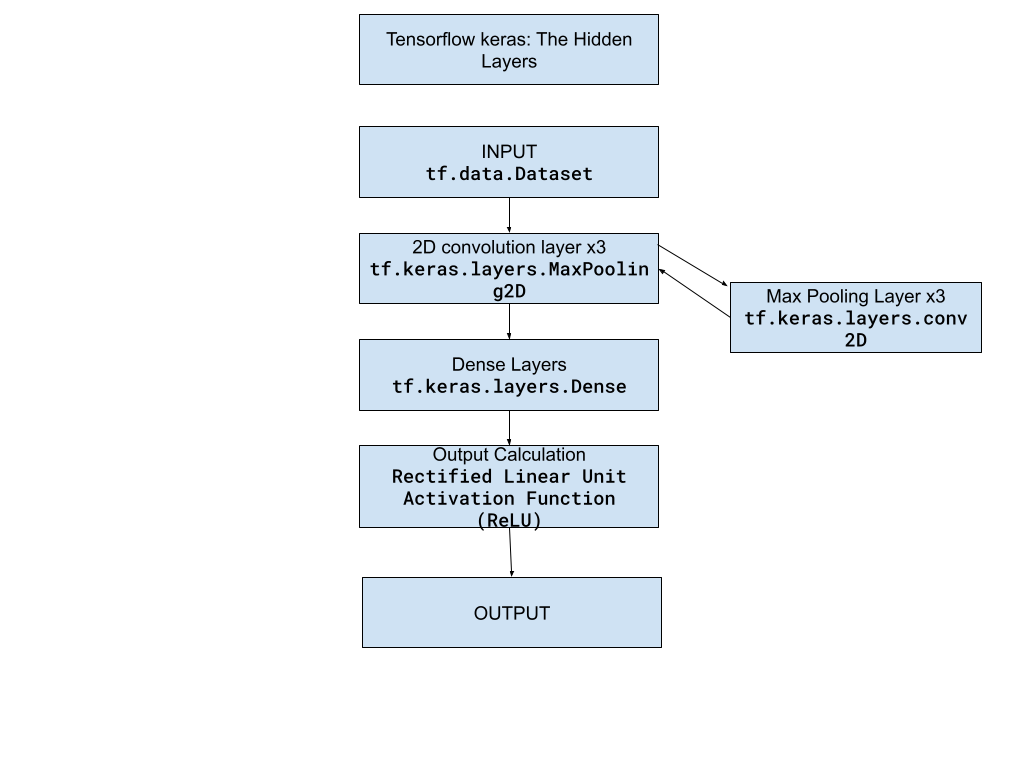

In [13]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

## Compilation of model

This section of code is responsible for the actual compilation of the model. This is where the different layers are grouped sequentially into a single object with training/inference features such as Optimizers and loss functions.


In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

This section of code is responsible for listing all of the layers that the present in the model alonside how much neurons they have.

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

## Training the Model

This section of code is responsible for training the model using the Keras `model.fit` method

In [16]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


2023-06-26 10:02:58.859594: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [10658]
	 [[{{node Placeholder/_4}}]]
2023-06-26 10:02:58.859880: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10658]
	 [[{{node Placeholder/_0}}]]


334/334 [==============================] - ETA: 0s - loss: 0.9742 - accuracy: 0.6217

2023-06-26 10:04:41.772249: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2664]
	 [[{{node Placeholder/_4}}]]
2023-06-26 10:04:41.772598: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2664]
	 [[{{node Placeholder/_0}}]]


334/334 [==============================] - 107s 320ms/step - loss: 0.9742 - accuracy: 0.6217 - val_loss: 0.8459 - val_accuracy: 0.6738
Epoch 2/10
334/334 [==============================] - 101s 303ms/step - loss: 0.7853 - accuracy: 0.6985 - val_loss: 0.8213 - val_accuracy: 0.6798
Epoch 3/10
334/334 [==============================] - 101s 303ms/step - loss: 0.6738 - accuracy: 0.7479 - val_loss: 0.7196 - val_accuracy: 0.7248
Epoch 4/10
334/334 [==============================] - 101s 302ms/step - loss: 0.5568 - accuracy: 0.7881 - val_loss: 0.7164 - val_accuracy: 0.7414
Epoch 5/10
334/334 [==============================] - 100s 301ms/step - loss: 0.4224 - accuracy: 0.8475 - val_loss: 0.7601 - val_accuracy: 0.7451
Epoch 6/10
334/334 [==============================] - 100s 300ms/step - loss: 0.2875 - accuracy: 0.8972 - val_loss: 0.8772 - val_accuracy: 0.7372
Epoch 7/10
334/334 [==============================] - 100s 300ms/step - loss: 0.1732 - accuracy: 0.9403 - val_loss: 0.9890 - val_accura

## Visualize training results

Now that the model has been trained, the loss and accuracy of the training and validation sets can be plotted.


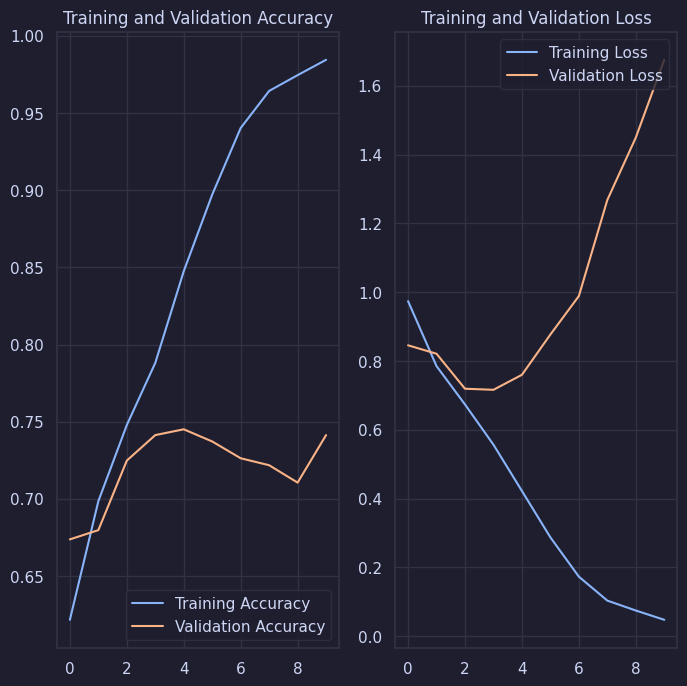

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

One of the noticable trends in these two graphs is the large disparity between `Training Accuracy` and `Validation Accuracy`. This indicates that there 

One of the reasons why there is a massive difference between `Training Accuracy` and `Validation Accuracy` is due to overfitting that may be present in the model. This is primarly caused by 

# Futher Model Optmization in order to reduce overfitting.

## Implementing Data Augmentation

One method that can be implented in order to mitigate the effects of overfitting is the use of Data augmentation. This is a technique to increase the diversity of a training set by applying random but realistic transformations, such as image rotation to copies of existing training images. This is done in order to expose the model to more aspects of the dataset so it can yield more accurate results.

The way that Data Augmentation was implemented in this model was using the standard method of implementation that is shown below:


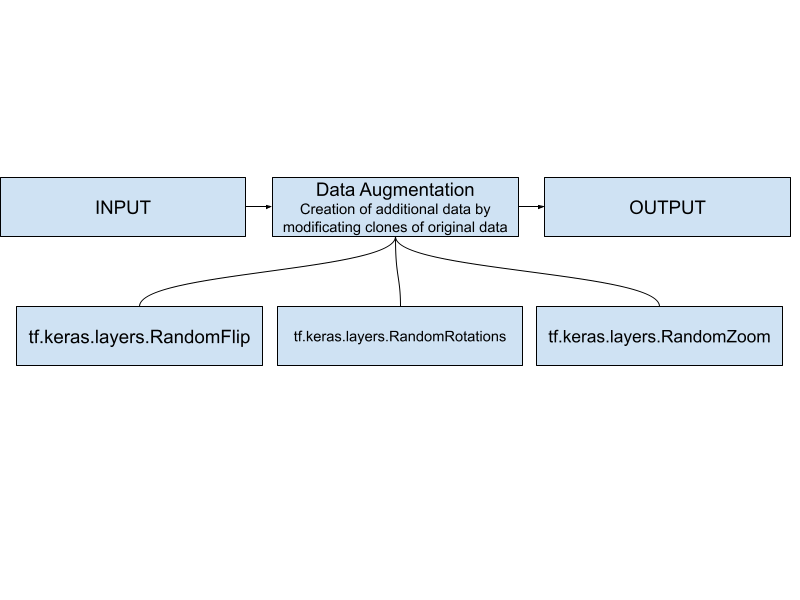

In [18]:
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

2023-06-26 10:19:51.298911: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [10658]
	 [[{{node Placeholder/_4}}]]
2023-06-26 10:19:51.299360: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [10658]
	 [[{{node Placeholder/_4}}]]


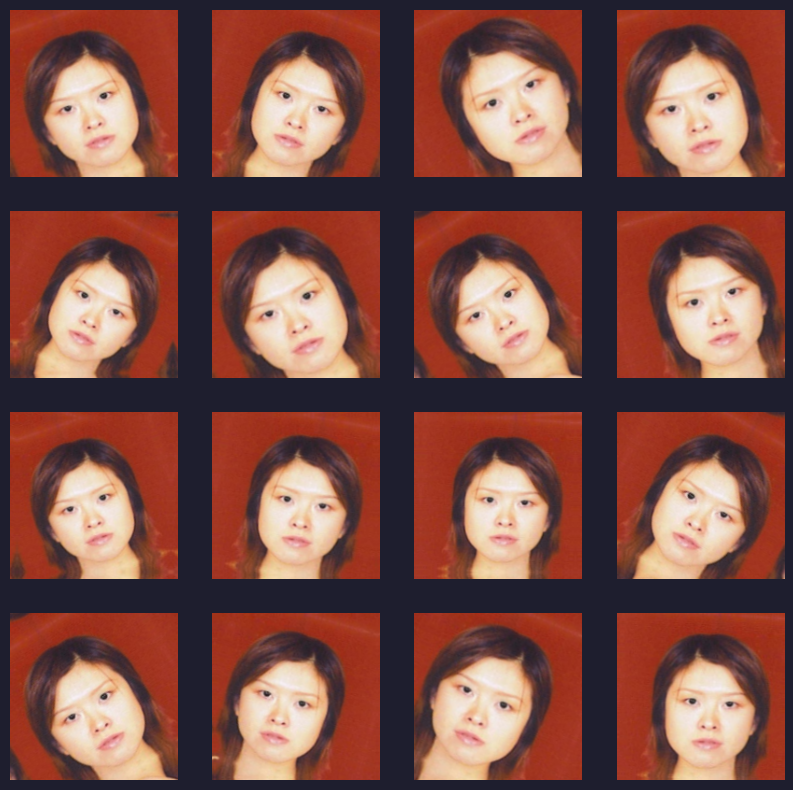

In [19]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(16):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## Recreation of the Keras Sequential Convolution layers with the includation of Dropout layer

In [20]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

## Recompilation of improved model

This section of code is responsible for the actual compilation of the model. This is where the different layers are grouped sequentially into a single object with training/inference features such as Optimizers and loss functions. This time however, the model will be compiled with a dropout layer

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

This section of code is responsible for listing all of the layers that the present in the model alonside how much neurons they have. Note how this summary has a dropout layer & an addtional 2 extra `conv2D` layers.

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

## Training final Model

In [23]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
334/334 [==============================] - 102s 302ms/step - loss: 1.0490 - accuracy: 0.5554 - val_loss: 0.9440 - val_accuracy: 0.6089
Epoch 2/15
334/334 [==============================] - 100s 299ms/step - loss: 0.9396 - accuracy: 0.6230 - val_loss: 0.8767 - val_accuracy: 0.6449
Epoch 3/15
334/334 [==============================] - 100s 300ms/step - loss: 0.8960 - accuracy: 0.6433 - val_loss: 0.8289 - val_accuracy: 0.6652
Epoch 4/15
334/334 [==============================] - 100s 299ms/step - loss: 0.8619 - accuracy: 0.6509 - val_loss: 0.8516 - val_accuracy: 0.6573
Epoch 5/15
334/334 [==============================] - 100s 298ms/step - loss: 0.8331 - accuracy: 0.6680 - val_loss: 0.7803 - val_accuracy: 0.6907
Epoch 6/15
334/334 [==============================] - 101s 303ms/step - loss: 0.8104 - accuracy: 0.6733 - val_loss: 0.7435 - val_accuracy: 0.7046
Epoch 7/15
334/334 [==============================] - 101s 303ms/step - loss: 0.7858 - accuracy: 0.6888 - val_loss: 0.7590 -

## Visualzing final results

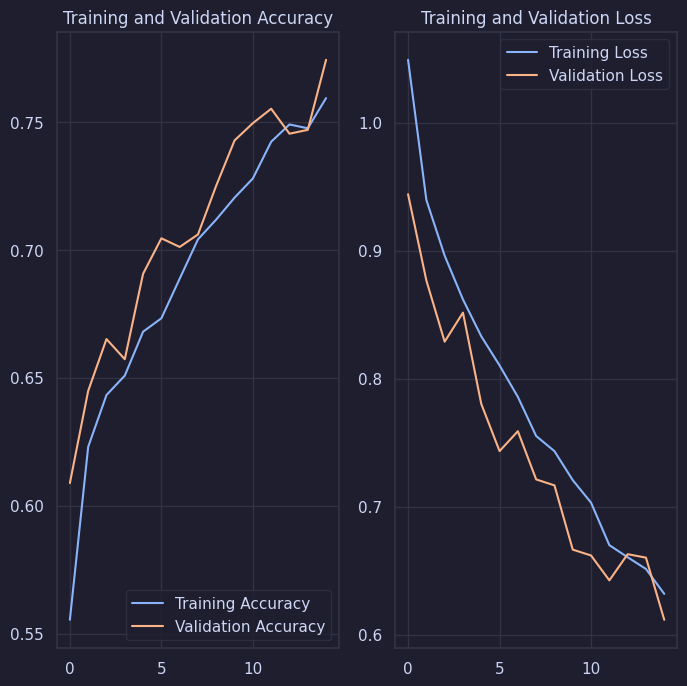

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluating Final Model by Predicting new Data

Please note that the code present in this section of the notebook will not run in the google collab envoirment. This is due to the photos used here only existing as local files and thefore can't be reliably imported into the Google Collab + Tensorflow envoirment. In order to get an real time demenstration, Please refer to the local `.ipynb` file attached with the assessment or the attached video on order to for the code used in this section. This has been done in order to protect the privacy of the indiviuals present in this trial.

## How does the model react to someone resembles the trainig data? - Boy

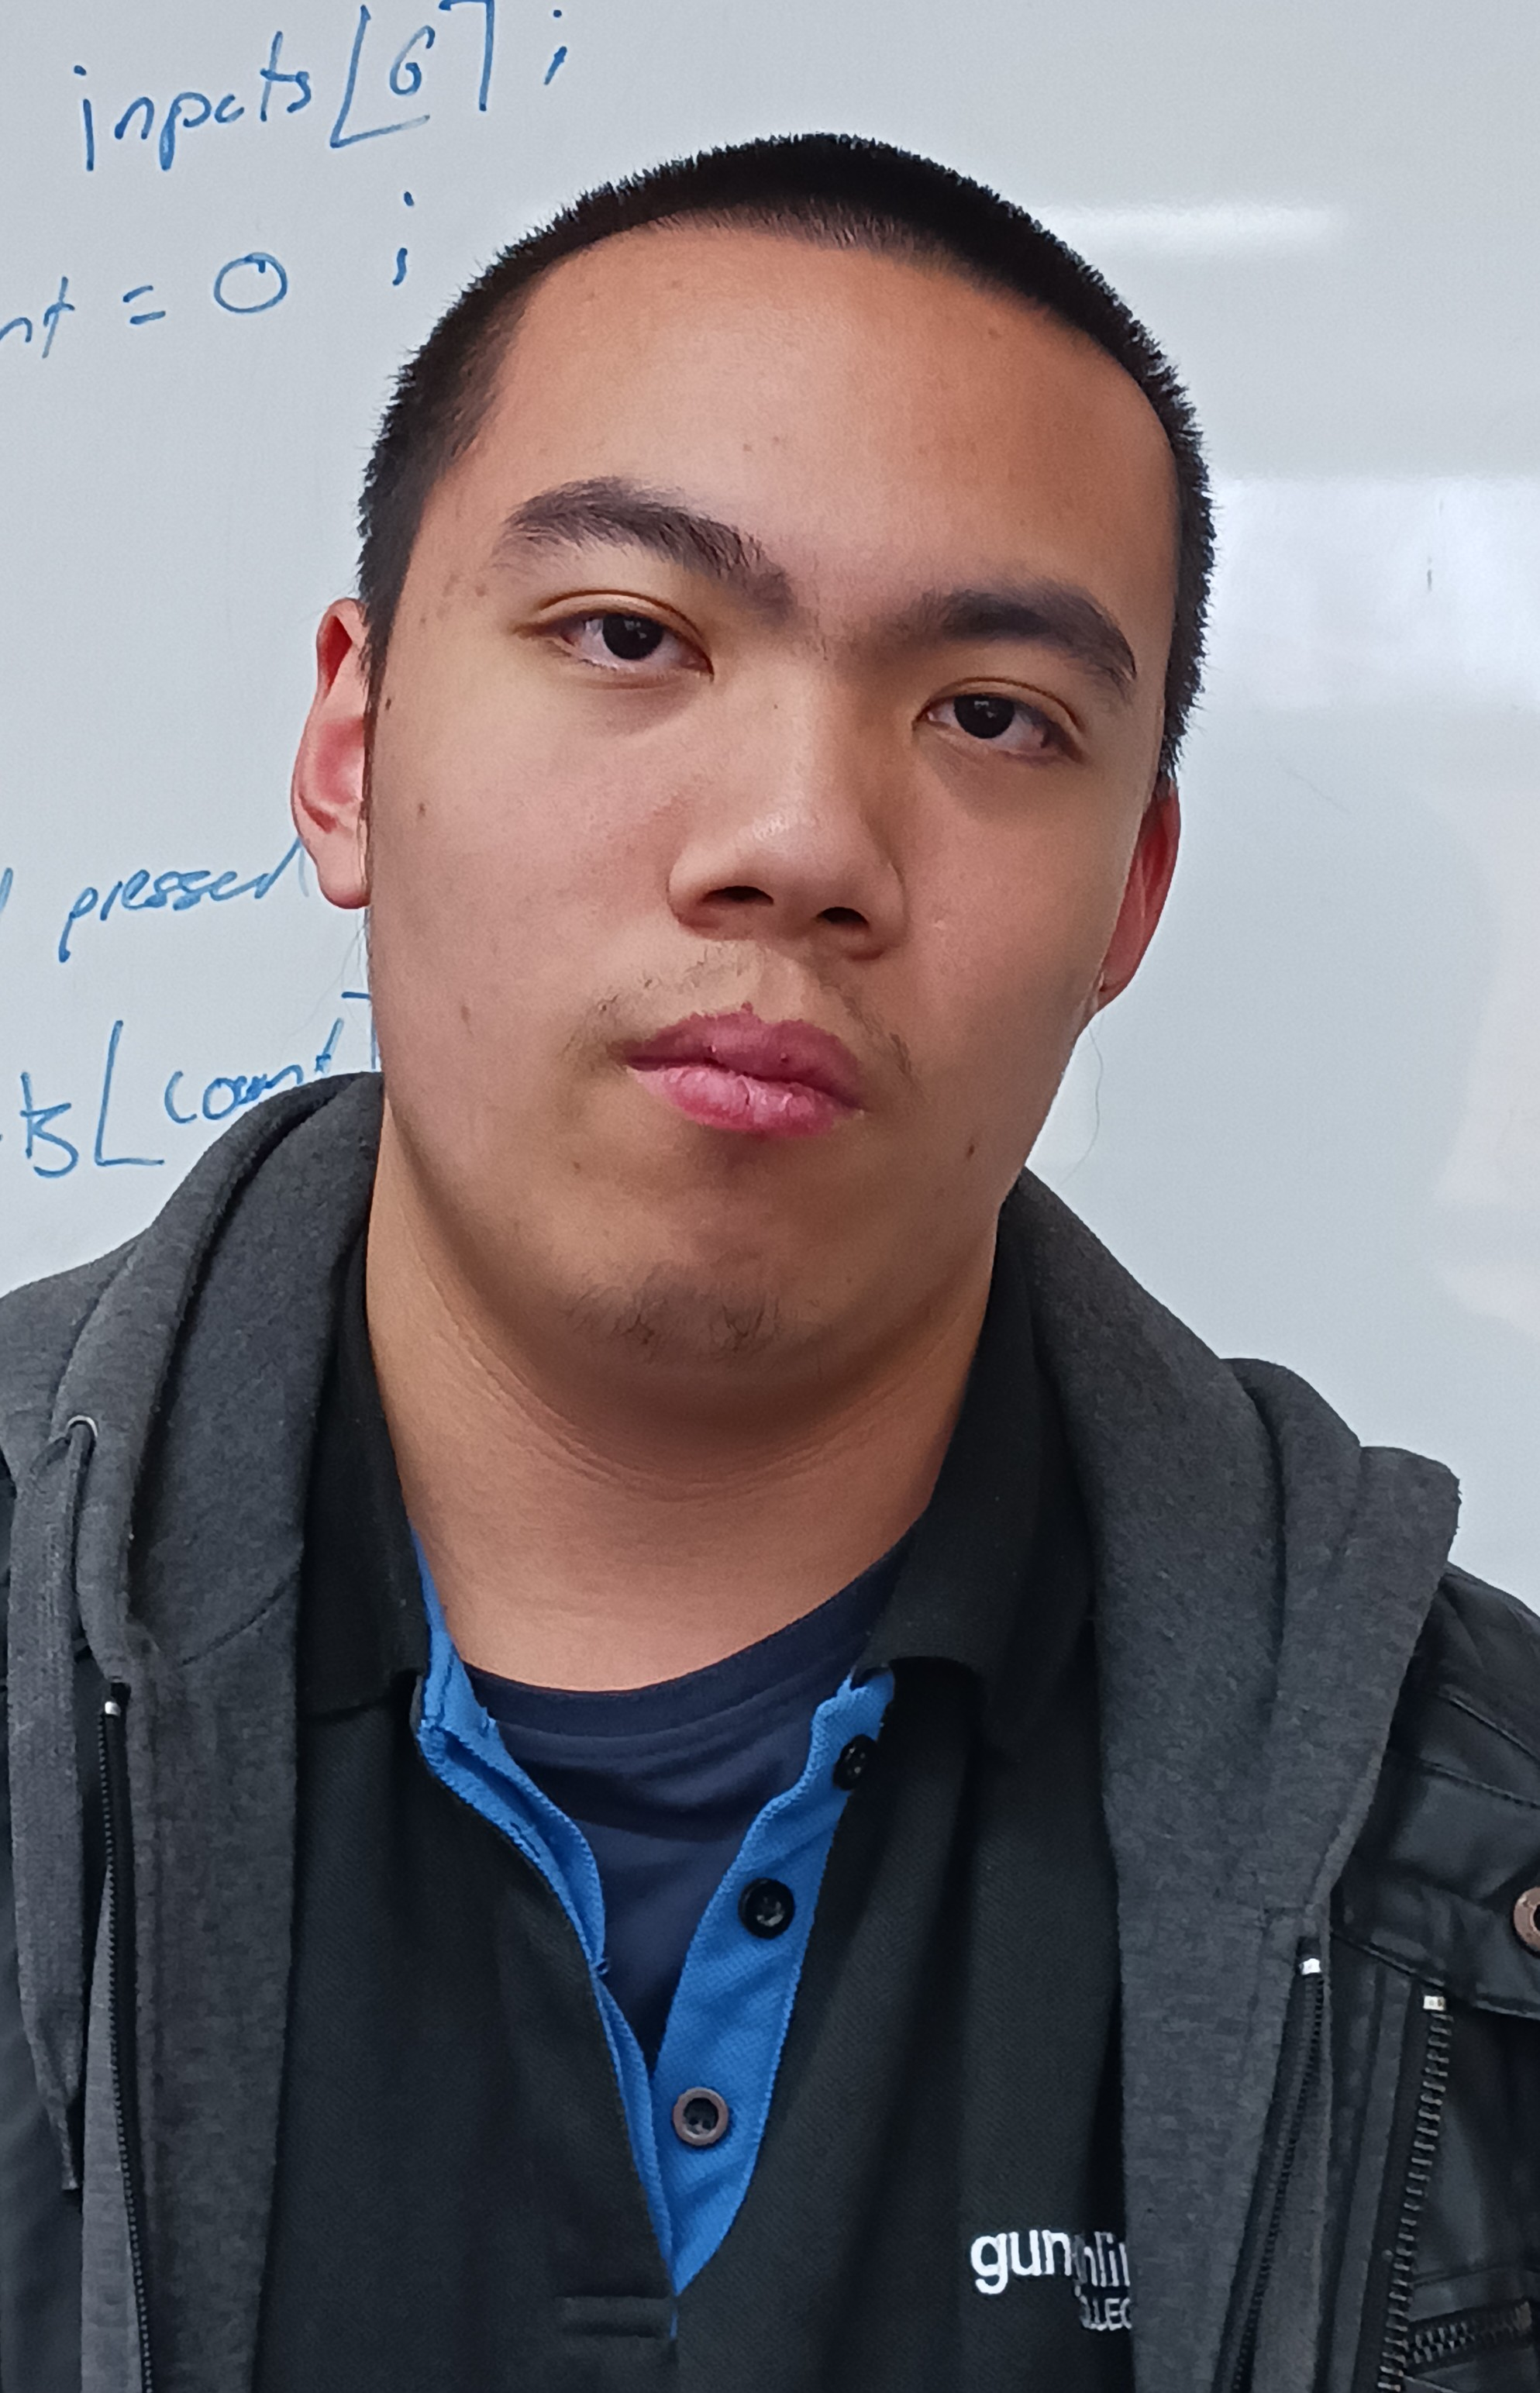

In [25]:
path = 'Control1.jpg'


Load_image = tf.keras.preprocessing.image.load_img(path, target_size=(img_height,img_width))

Control1_img_array = tf.keras.utils.img_to_array(Load_image)
Control1_img_array = tf.expand_dims(Control1_img_array, 0) # Create a batch

Control1_predictions = model.predict(Control1_img_array)
Control1_score = tf.nn.softmax(Control1_predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(Control1_score)], 100 * np.max(Control1_score))
)
Load_image
print('Correct Label: Man')

1/1 [==============================] - 0s 64ms/step
This image most likely belongs to Man with a 80.98 percent confidence.
Correct Label: Man


Returned Values
1. Trial 1 - Man with a 92.04% confidence
2. Trial 2 - Man with a 77.33% confidence


---




## How does the model react to someone who resembles the training data? - Girl 

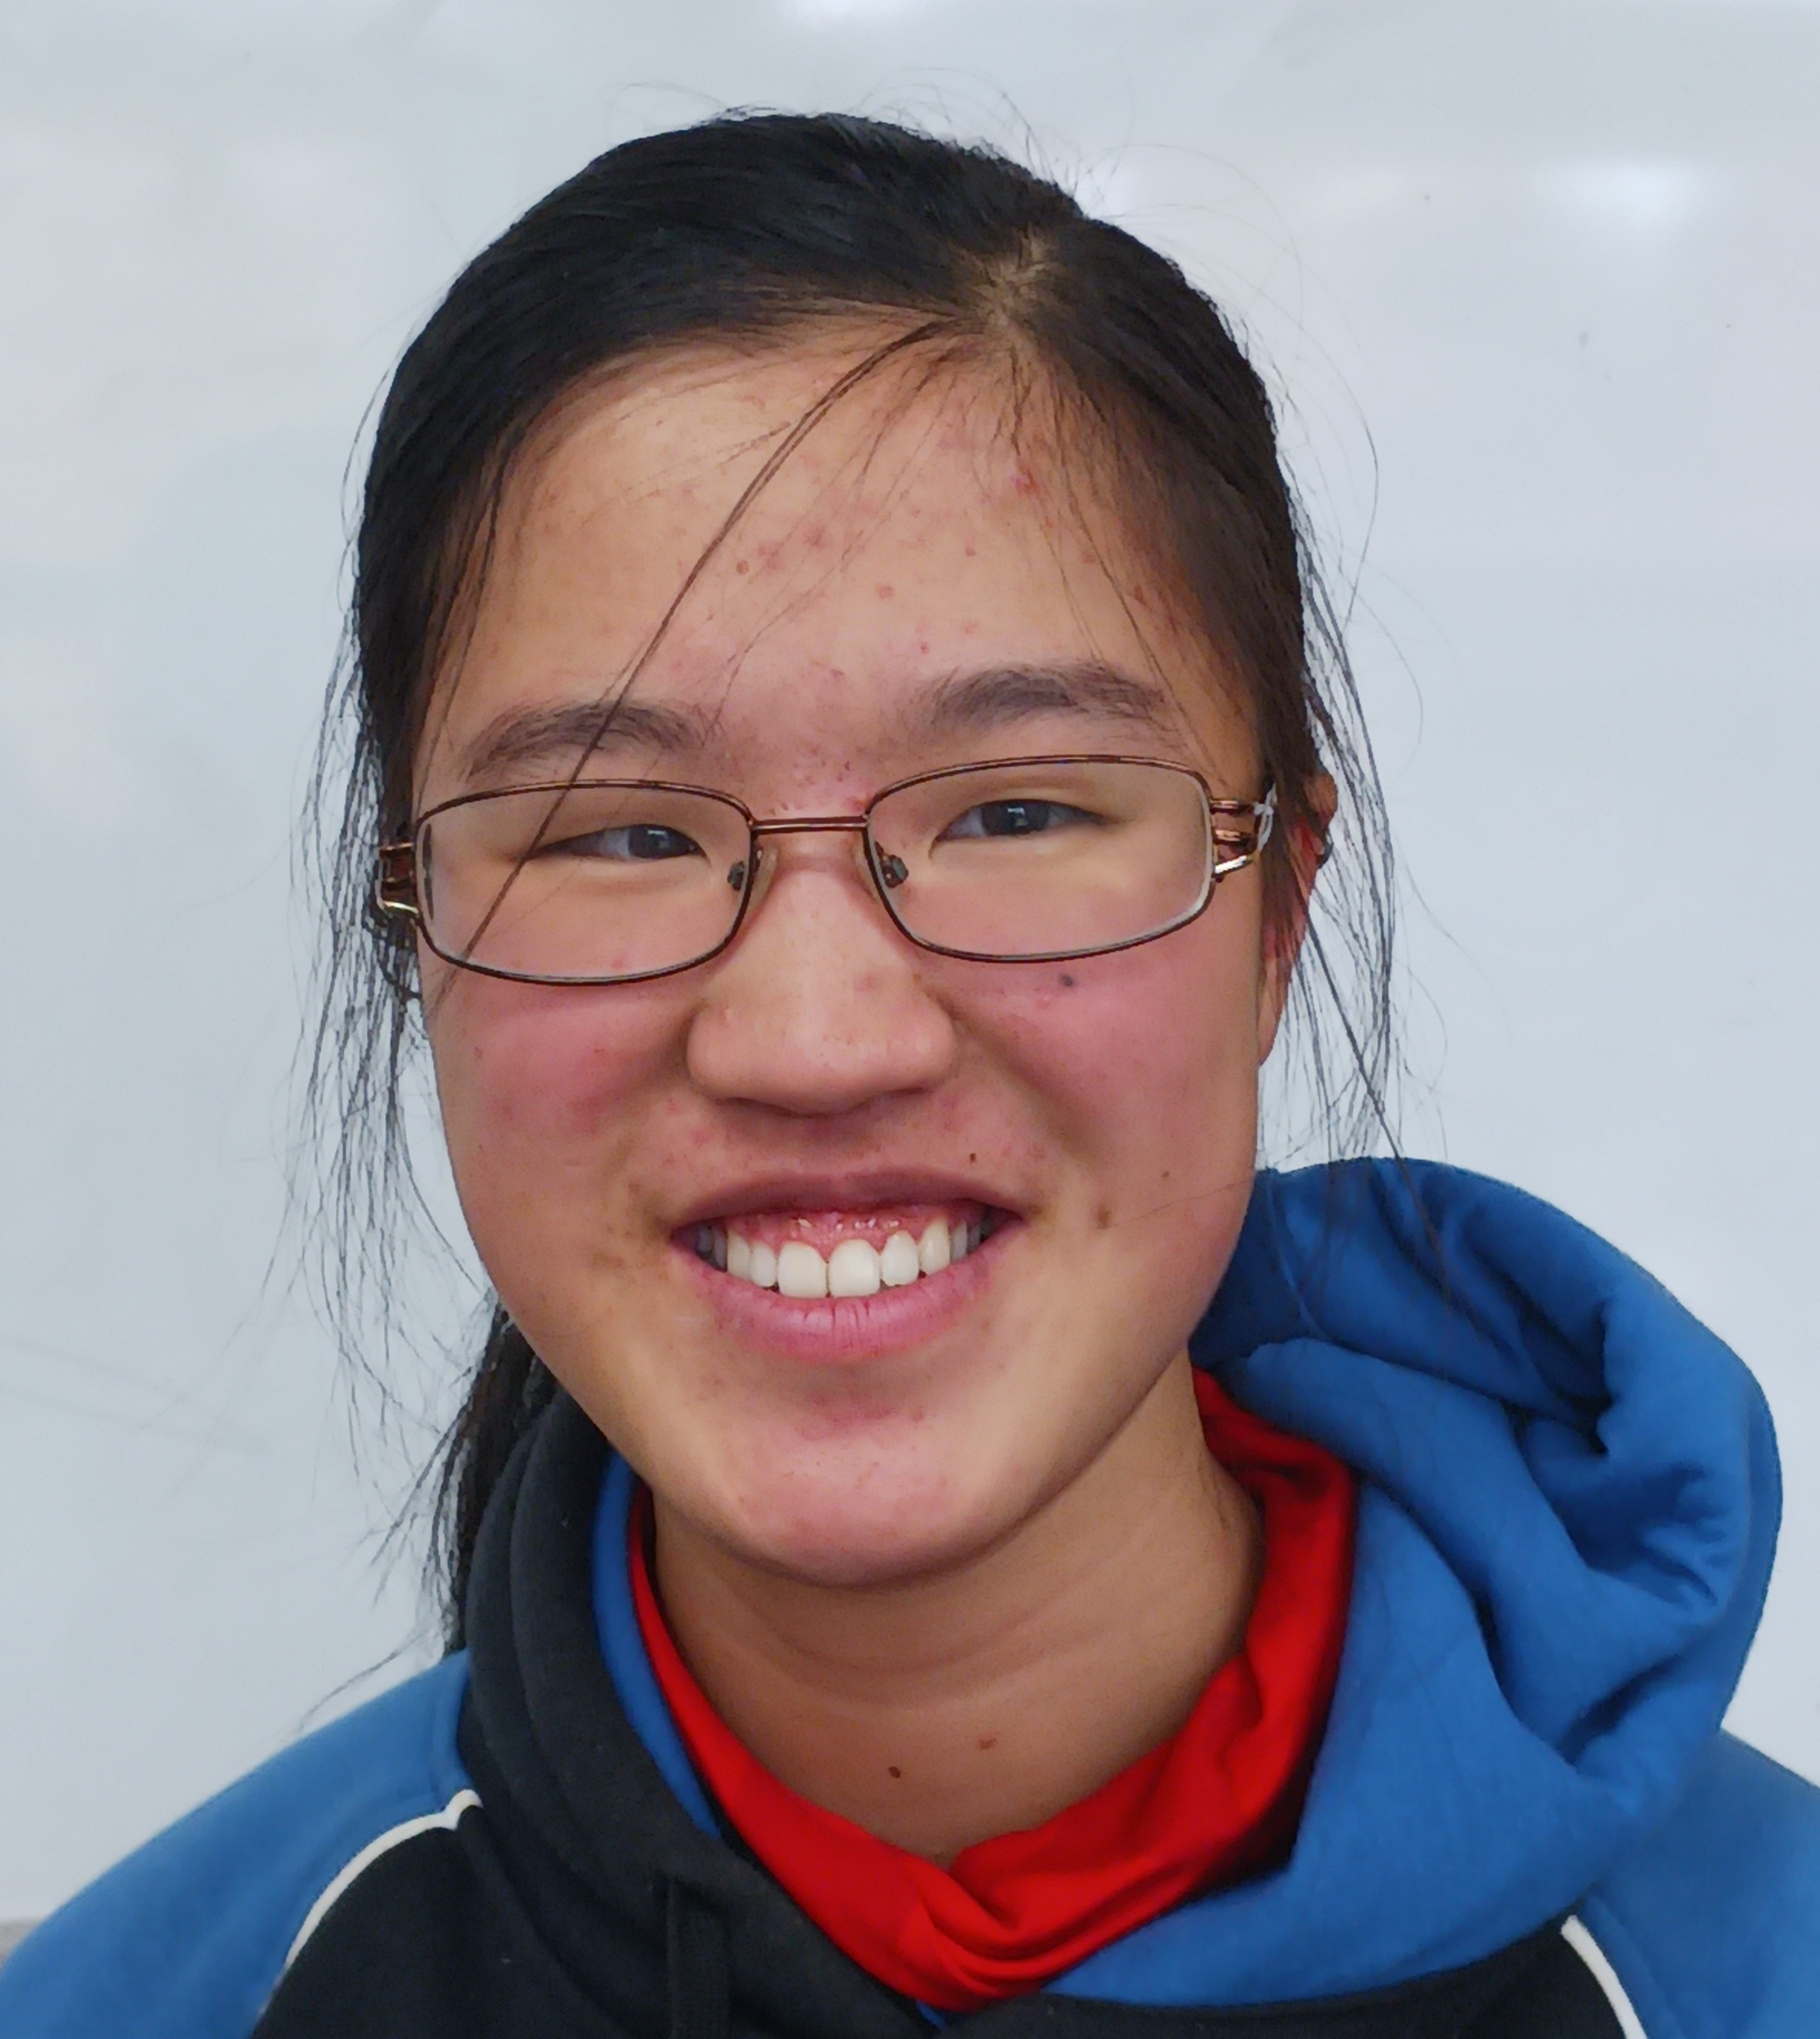

In [26]:
Control_girl_path = 'Model_control2.jpg'

Control_girl_img  = tf.keras.preprocessing.image.load_img(Control_girl_path, target_size=(img_height,img_width))

Control_girl_array = tf.keras.utils.img_to_array(Control_girl_img)
Control_girl_array = tf.expand_dims(Control_girl_array, 0)

Control_girl_predictions = model.predict(Control_girl_array)
Control_girl_score = tf.nn.softmax(Control_girl_predictions[0])


print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(Control_girl_score)], 100 * np.max(Control_girl_score))
)
Control_girl_img
print('Correct label: Girl')

1/1 [==============================] - 0s 14ms/step
This image most likely belongs to Man with a 93.04 percent confidence.
Correct label: Girl


Returned Values

1. Trial 1 - Man with 82.04 Confidence
2. Trial 2 - Man with 85.53 Confidence


---
Some possible reasons why the model didn't sucessfuly identify the correct gender of the person in the image can be due to the weights that the model has been trained on


## How does Makeup affect the Model's perception?
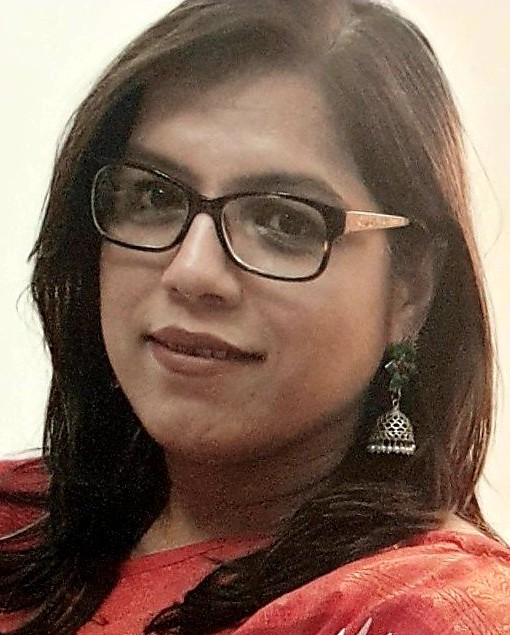

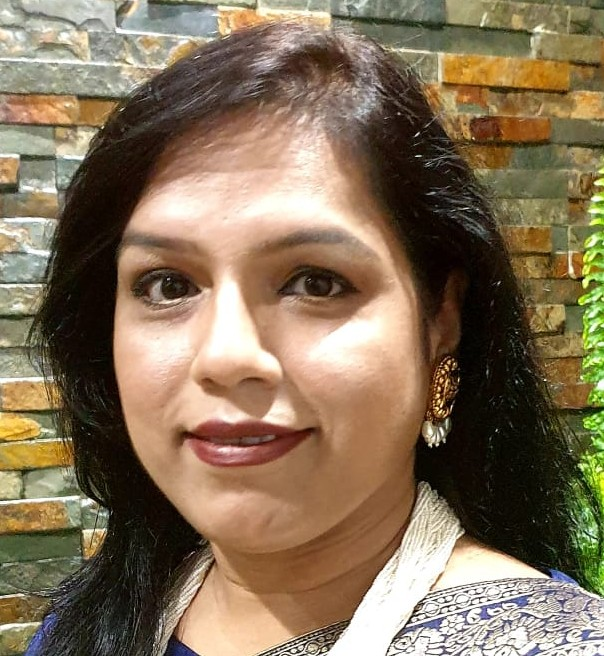

In [27]:
Light_path = 'Light_makeup.jpg'
Light_img = tf.keras.preprocessing.image.load_img(Light_path, target_size=(img_height,img_width))

Light_array = tf.keras.utils.img_to_array(Light_img)
Light_array = tf.expand_dims(Light_array, 0)

Light_predictions = model.predict(Light_array)
Light_score = tf.nn.softmax(Light_predictions[0])


print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(Light_score)], 100 * np.max(Light_score))
)
Light_img
print('Correct Label: Woman')

1/1 [==============================] - 0s 13ms/step
This image most likely belongs to Woman with a 59.19 percent confidence.
Correct Label: Woman


In [28]:
Heavy_path = 'Heavy_makeup.jpg'
Heavy_img = tf.keras.preprocessing.image.load_img(Heavy_path, target_size=(img_height,img_width))

Heavy_array = tf.keras.utils.img_to_array(Heavy_img)
Heavy_array = tf.expand_dims(Heavy_array, 0)

Heavy_predictions = model.predict(Heavy_array)
Heavy_score = tf.nn.softmax(Heavy_predictions[0])


print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(Heavy_score)], 100 * np.max(Heavy_score))
)
Heavy_img
print('Correct Label: Woman')

1/1 [==============================] - 0s 14ms/step
This image most likely belongs to Woman with a 95.24 percent confidence.
Correct Label: Woman


Returned Values
1. Light Makeup - Woman with 66.84% confidence
2. Heavy Makeup - Woman with 92.83% confidence


---



Interestingly, makeup (& possiblely the lack of glaases) does actually have an effect on the confidence that the model has on declearing if a person is a woman or not. This is most likely due to the fact that the training data for woman was gathered largly of from social media. This is important to note since people on social media tend to make themselves more presentable in the images that they post, and one aspect of this process for woman is the application of makeup. This in turn has skews the model's perception of what a woman is in a negative way due to the training data having a skewed number of woman in heavy makeup compeared to woman not in makeup. 

## How does the model react to Headwear?
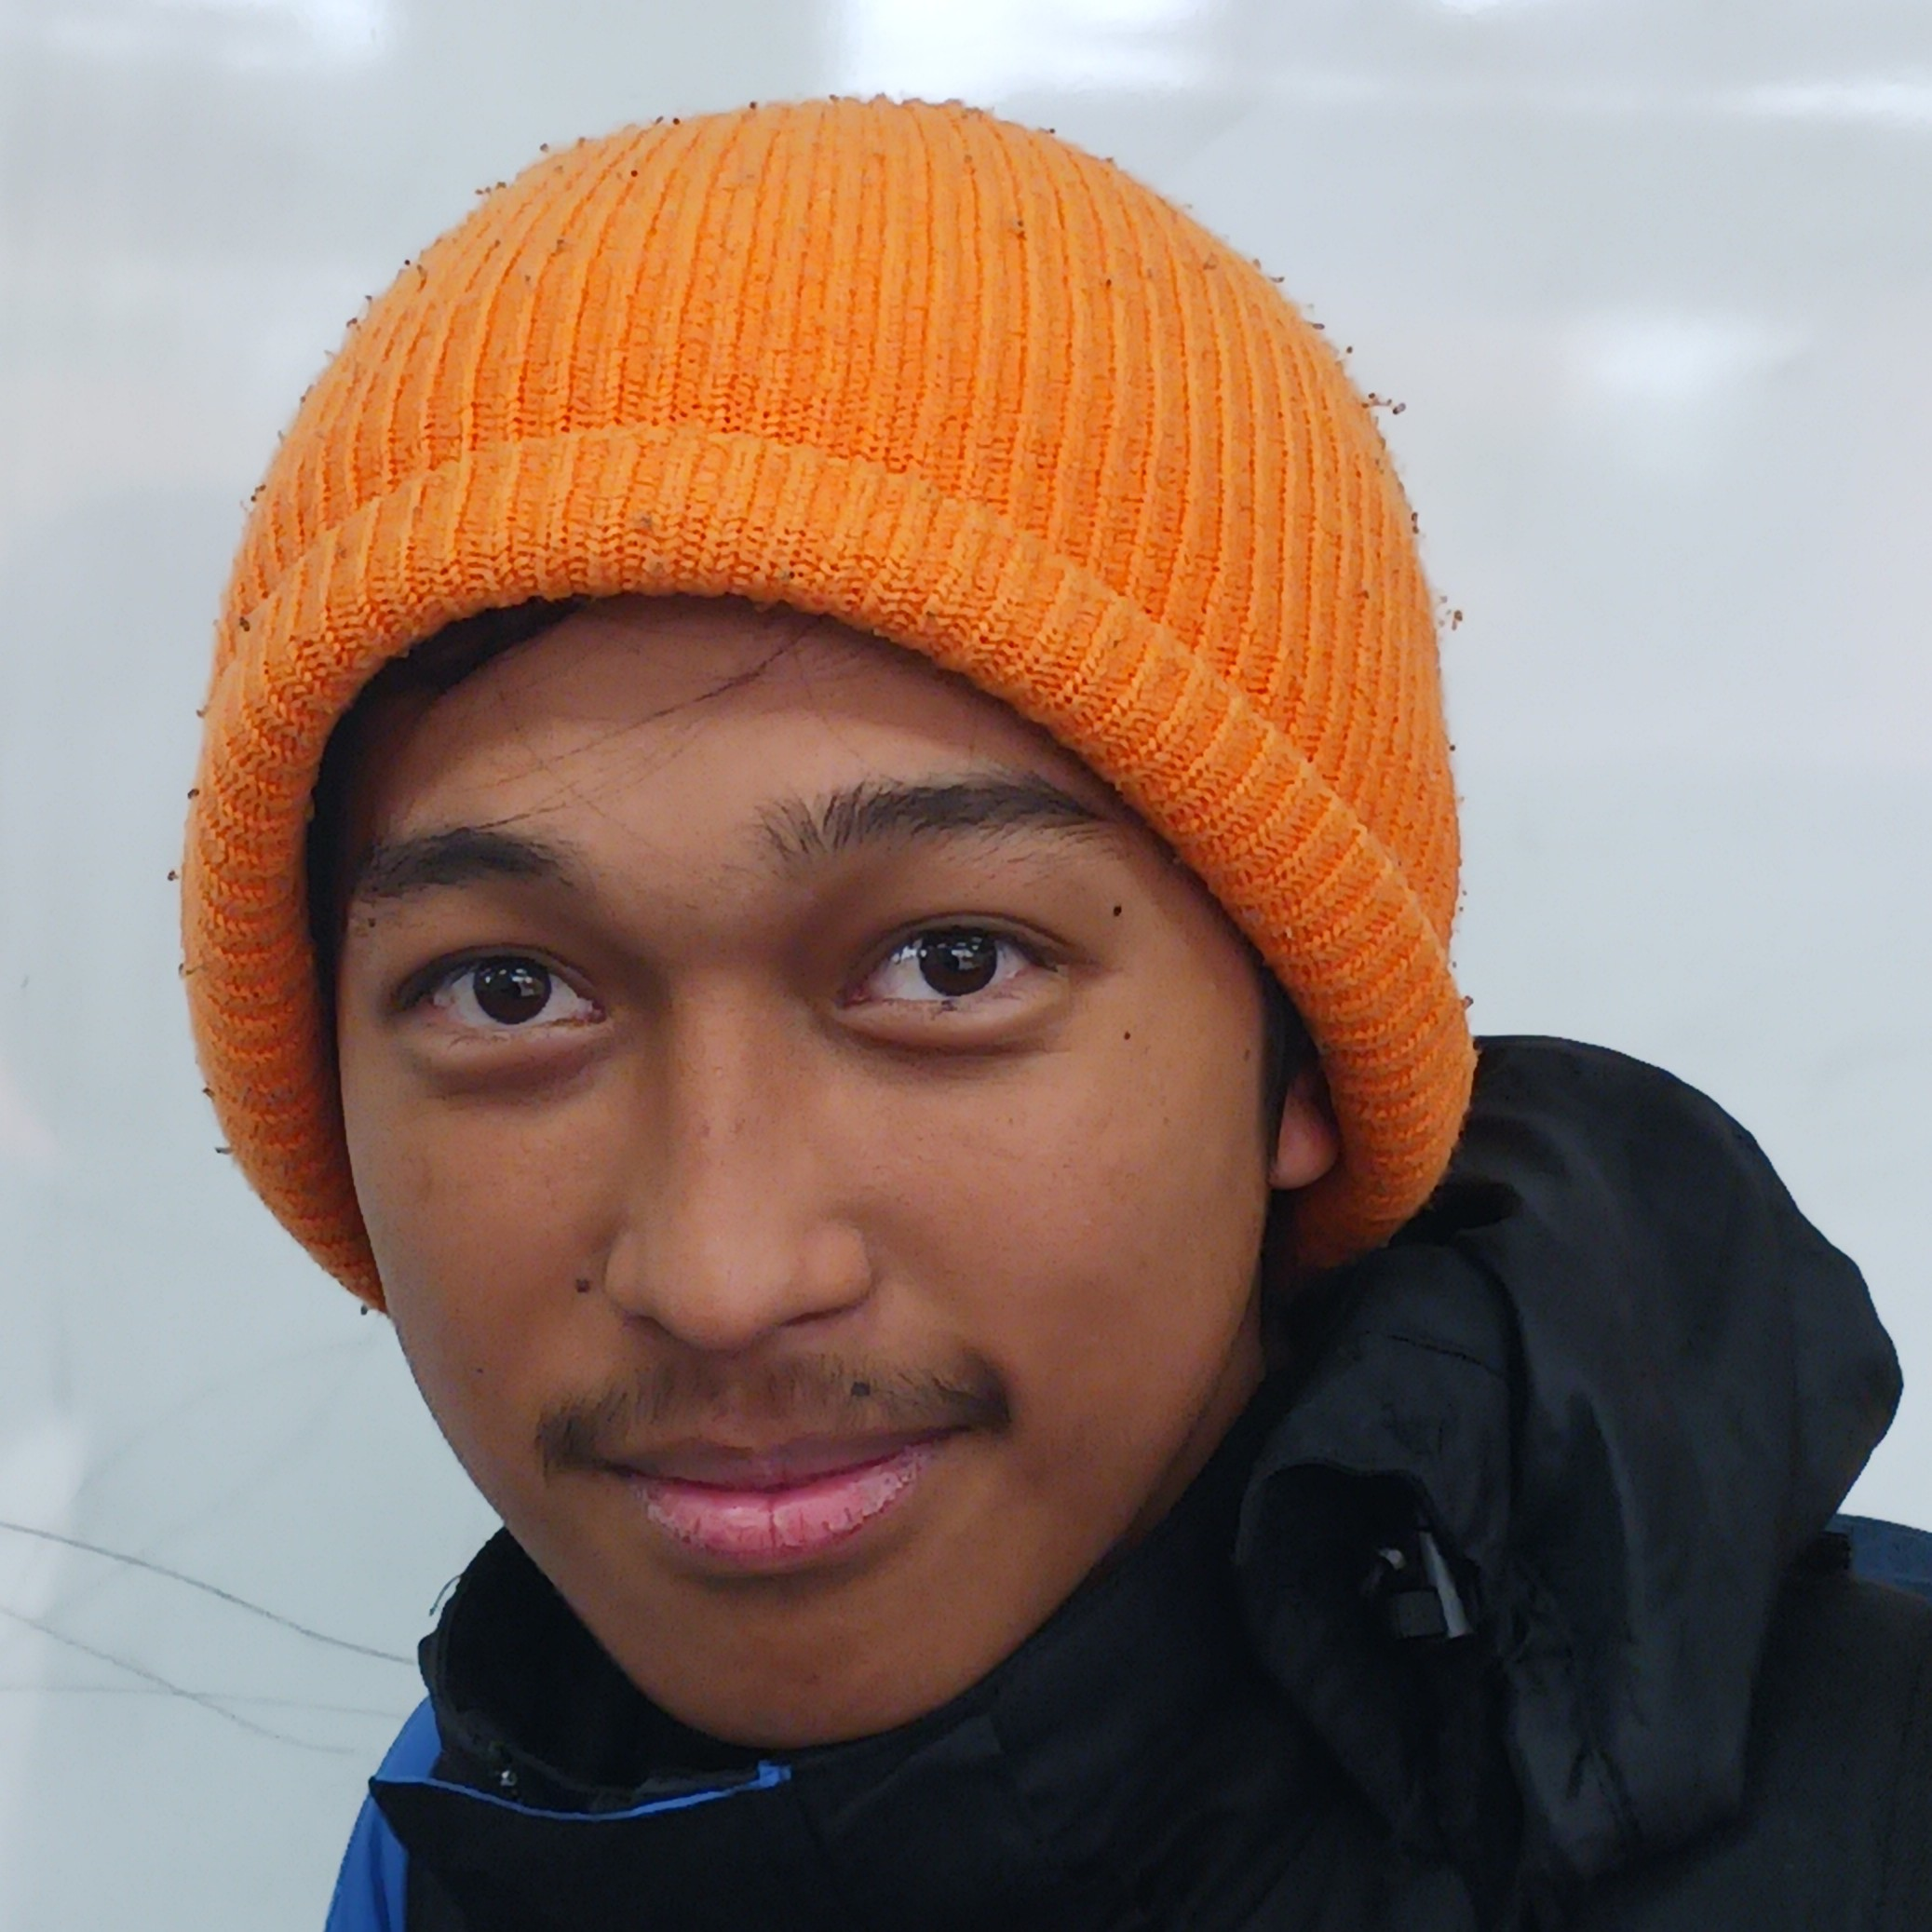

In [29]:
Beanie_path = 'Model_headware.jpg'
Beanie_img = tf.keras.preprocessing.image.load_img(Beanie_path, target_size=(img_height,img_width))

Beanie_array = tf.keras.utils.img_to_array(Beanie_img)
Beanie_array = tf.expand_dims(Beanie_array, 0)

Beanie_predictions = model.predict(Beanie_array)
Beanie_score = tf.nn.softmax(Beanie_predictions[0])


print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(Beanie_score)], 100 * np.max(Beanie_score))
)

Beanie_img
print('Correct Label: Boy')

1/1 [==============================] - 0s 14ms/step
This image most likely belongs to Man with a 83.99 percent confidence.
Correct Label: Boy


Returned Values
1. Trial 1 - Man with 94.13% Confidence
2. Trial 2 - Man with 93.39% Confidence


---
It is intersting to note that common headware such as beanies have no affect on the model's ability to sucessfully identify the image feed into it. This indicates that the face & facial features have an increased weight placed compared to hair. Another possible theory is that due to the lack of hair, there was no weight placed on those area at all, and that the model is actually adapting by changing its weights due to the absence of one weight.


## How does abnormal Headwear affect the Model's perception?
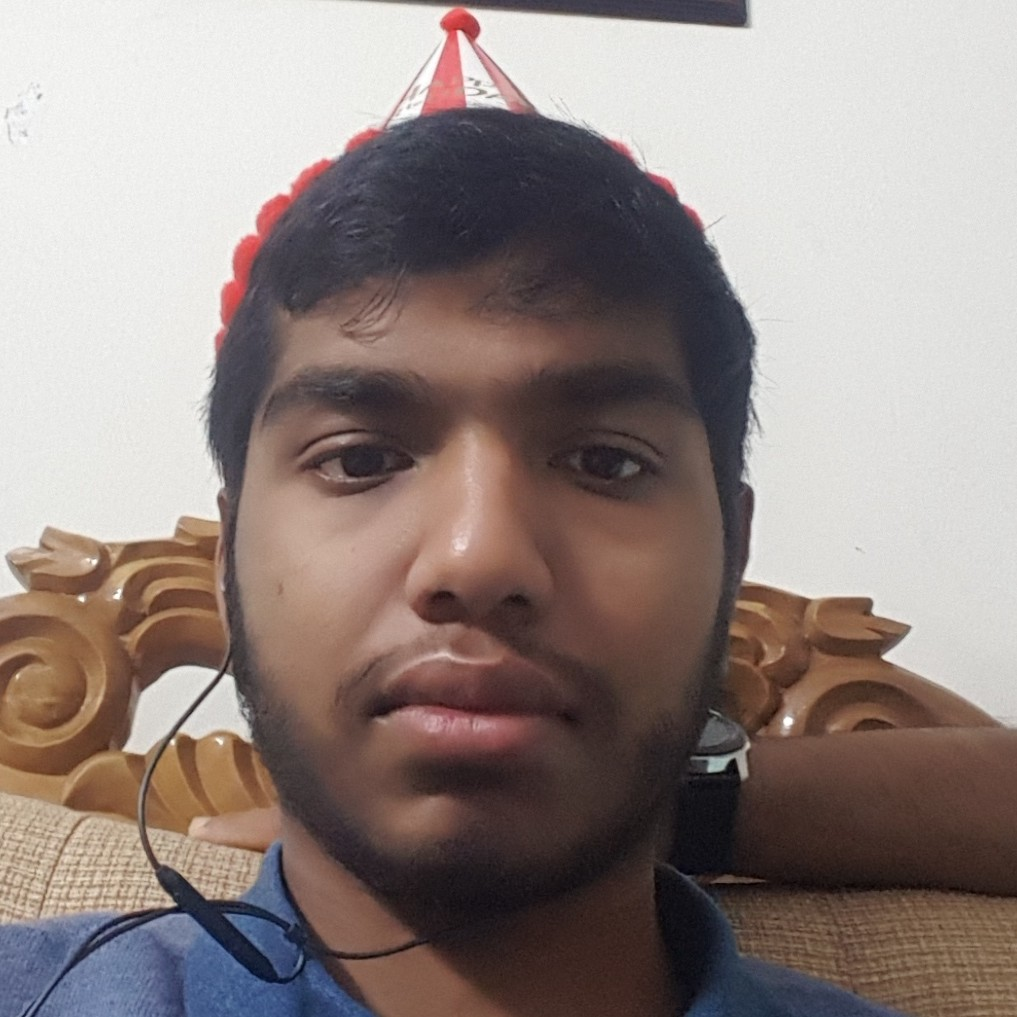

In [30]:
Foreigner3_path = 'Model_Forigen2.jpg'
Foreigner3_img = tf.keras.preprocessing.image.load_img(Foreigner3_path, target_size=(img_height,img_width))

Foreigner3_array = tf.keras.utils.img_to_array(Foreigner3_img)
Foreigner3_array = tf.expand_dims(Foreigner3_array, 0)

Foreigner3_predictions = model.predict(Foreigner3_array)
Foreigner3_score = tf.nn.softmax(Foreigner3_predictions[0])


print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(Foreigner3_score)], 100 * np.max(Foreigner3_score))
)
Foreigner3_img
print('Correct Label: Man')

1/1 [==============================] - 0s 14ms/step
This image most likely belongs to Boys with a 45.17 percent confidence.
Correct Label: Man


Returned Values
1. Trial 1 - Girl with 37.02% confidence
2. Trial 2 - Boy with 64.45% confidence


---
One possible theory towards why this image is often incorrectly recognised can due to the angle that this photo was taken. This cause the party hat to look like a tiara, something that was only present in the training data for woman. This coupled with the fact that there was no party hats in the training data caused the suppposed "tirana" to have a heavier weight comparaed to other aspects of the photo such as facial stucture & expressions. 


## How does the model Interpret Forigners (Indians)?

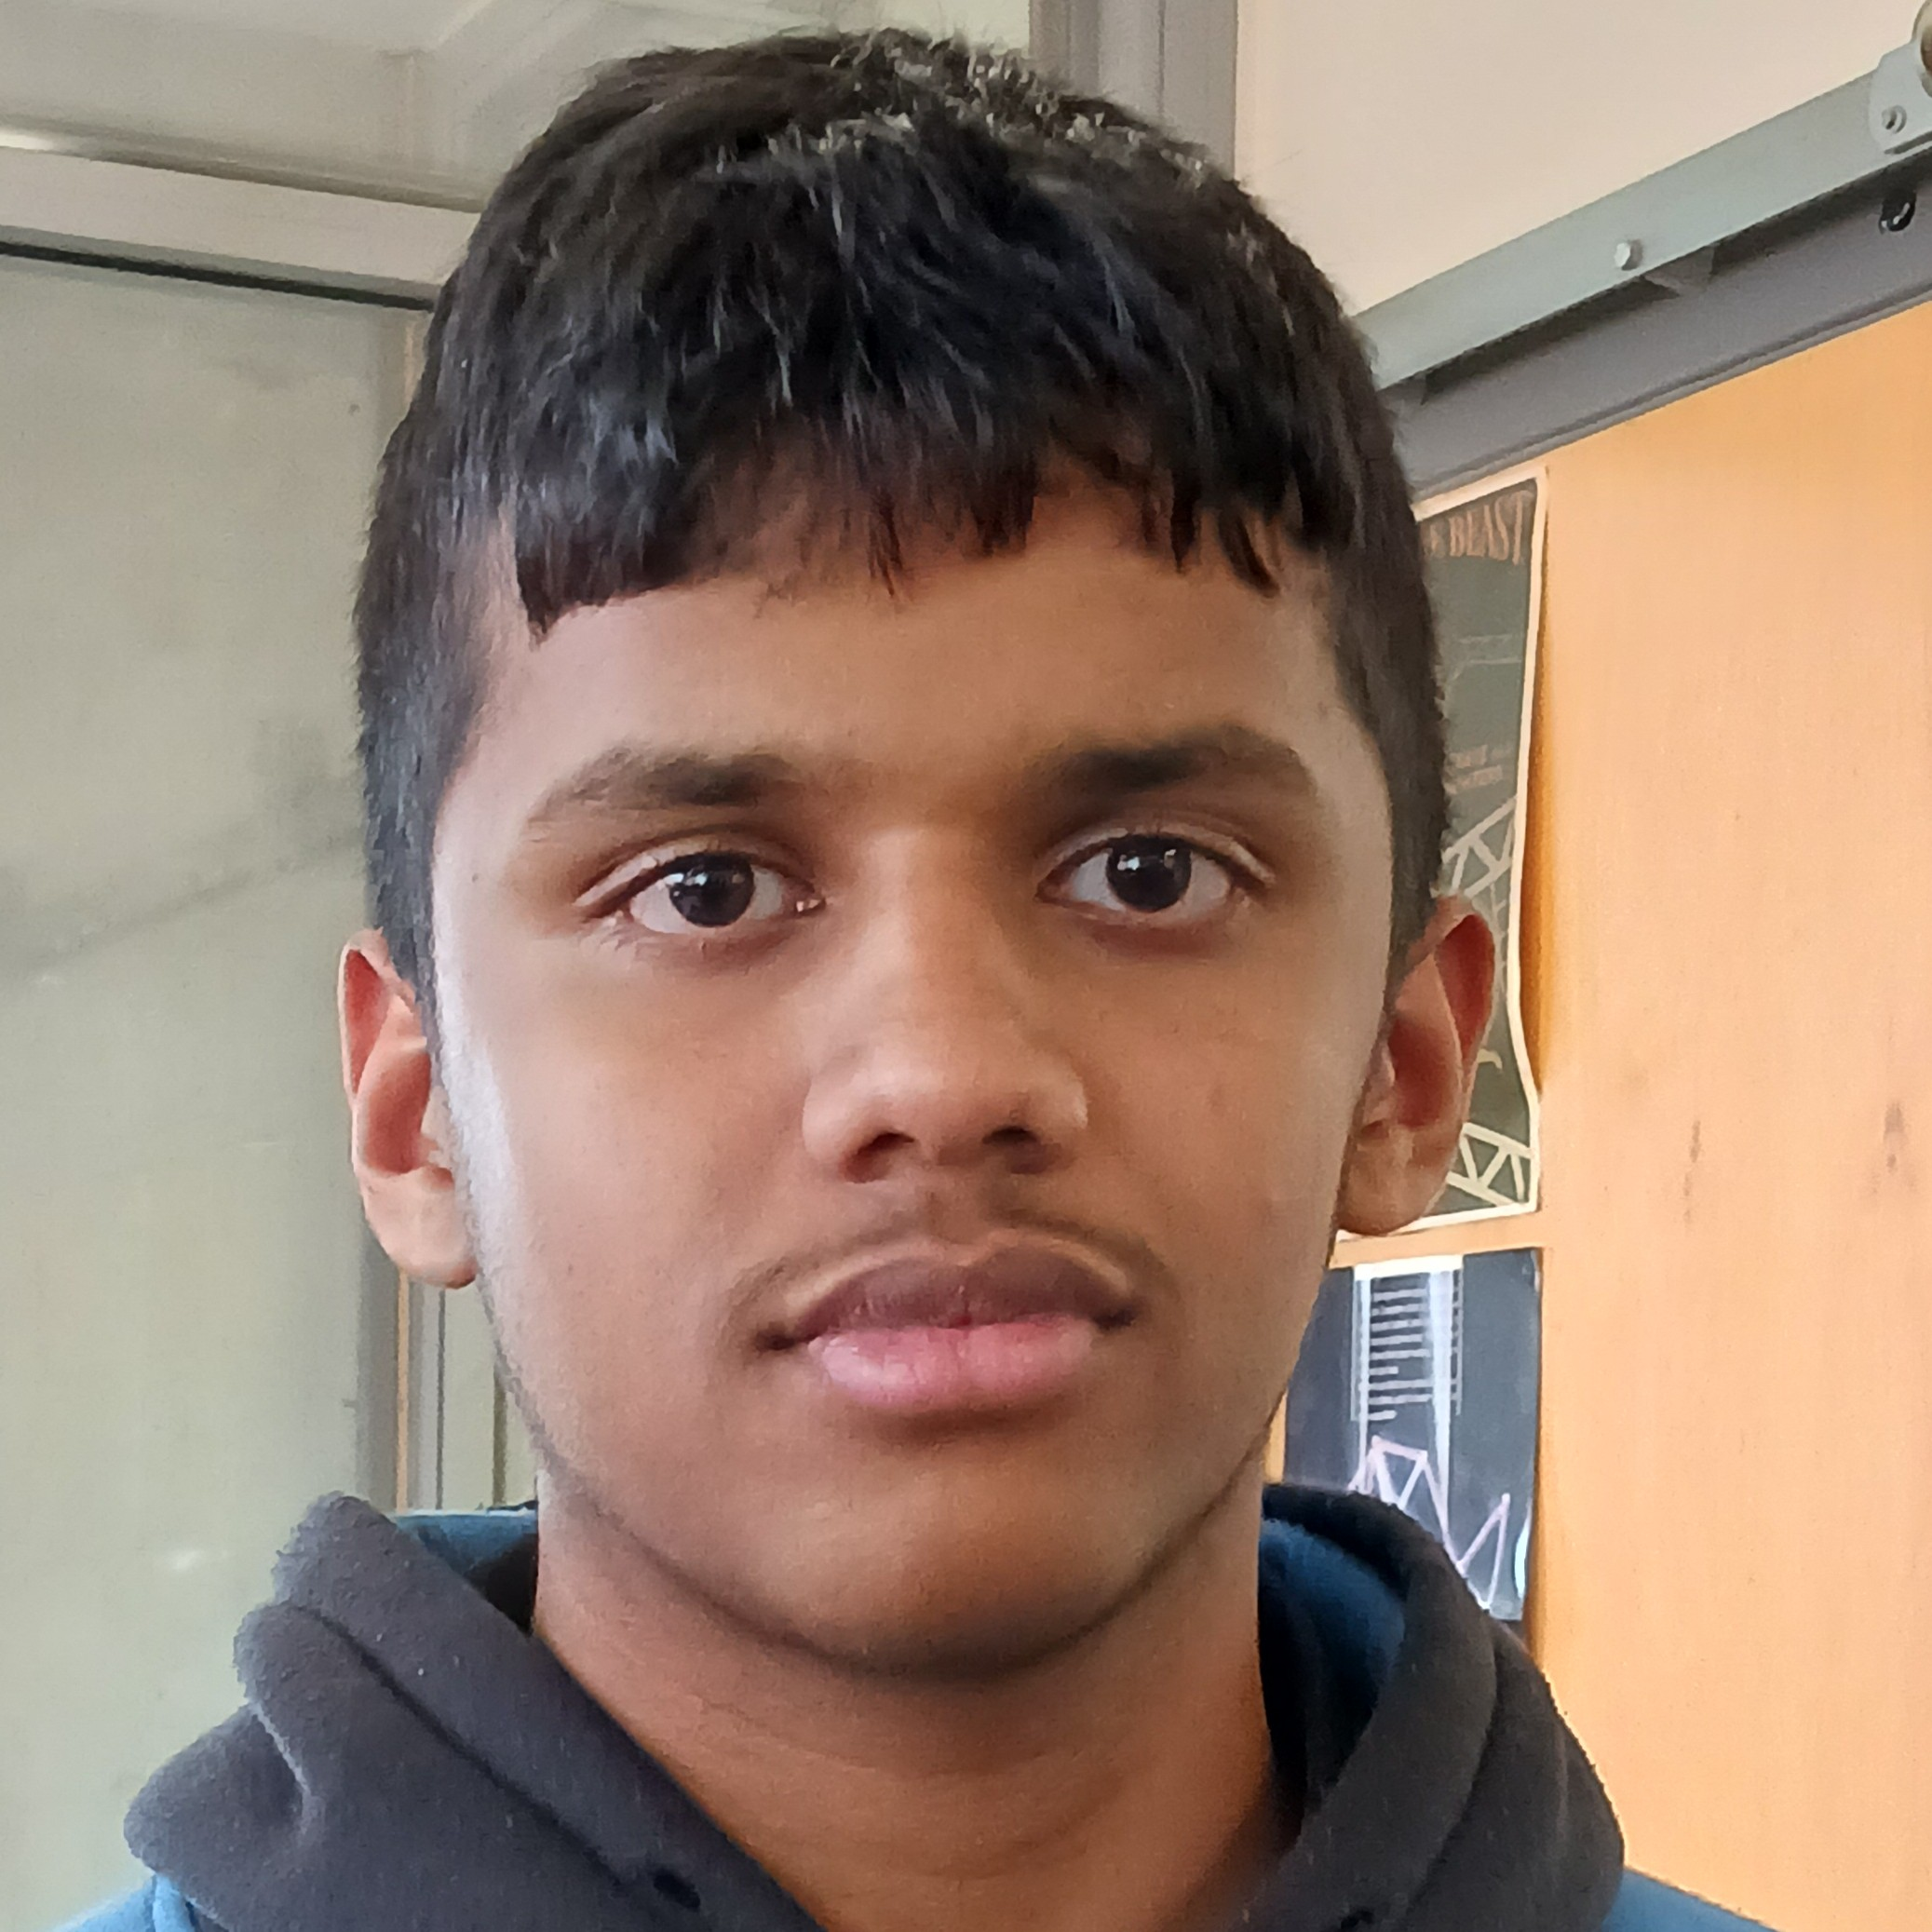

In [31]:
Foreigner_path = 'Foreign_2.jpg'
Foreigner_img = tf.keras.preprocessing.image.load_img(Foreigner_path, target_size=(img_height,img_width))

Foreigner_array = tf.keras.utils.img_to_array(Foreigner_img)
Foreigner_array = tf.expand_dims(Foreigner_array, 0)

Foreigner_predictions = model.predict(Foreigner_array)
Foreigner_score = tf.nn.softmax(Foreigner_predictions[0])



print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(Foreigner_score)], 100 * np.max(Foreigner_score))
)
Foreigner_img
print('Correct Label: Boy')

1/1 [==============================] - 0s 15ms/step
This image most likely belongs to Man with a 84.37 percent confidence.
Correct Label: Boy


Returned Values
1. Trial 1 - Man with 94.42% confidence
2. Trial 2 - Man with 92.61% confidence


---

## How abstract can the facial features be without affecting on the model's perception?
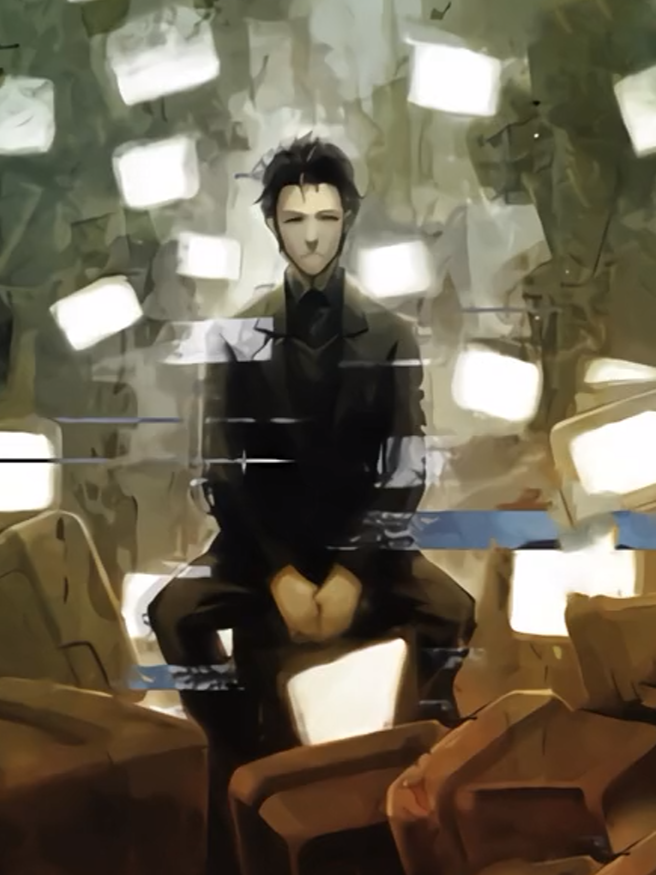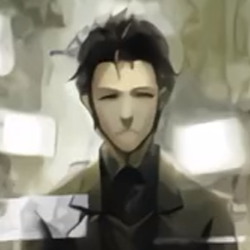

In [32]:
SadSci_path = 'FailedFutureCrop.png'
SadSci_img = tf.keras.preprocessing.image.load_img(SadSci_path, target_size=(img_height,img_width))

SadSci_array = tf.keras.utils.img_to_array(SadSci_img)
SadSci_array = tf.expand_dims(SadSci_array, 0)

SadSci_predictions = model.predict(SadSci_array)
SadSci_score = tf.nn.softmax(SadSci_predictions[0])
 

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(SadSci_score)], 100 * np.max(SadSci_score))
)
SadSci_img
print('Correct Label: Man')

1/1 [==============================] - 0s 15ms/step
This image most likely belongs to Man with a 58.09 percent confidence.
Correct Label: Man


In [33]:
SadSci2_path = 'FailedFutureCrop2.png'
SadSci2_img = tf.keras.preprocessing.image.load_img(SadSci2_path, target_size=(img_height,img_width))

SadSci2_array = tf.keras.utils.img_to_array(SadSci2_img)
SadSci2_array = tf.expand_dims(SadSci2_array, 0)

SadSci2_predictions = model.predict(SadSci2_array)
SadSci2_score = tf.nn.softmax(SadSci2_predictions[0])
 

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(SadSci2_score)], 100 * np.max(SadSci2_score))
)
SadSci2_img
print('Correct Label: Man')

1/1 [==============================] - 0s 14ms/step
This image most likely belongs to Man with a 60.73 percent confidence.
Correct Label: Man


Returned Values:
1. Whole body - Man with 62.32% confidence
2. Headshot - Man with 83.65% confidence


---
Due to the lack of facial features, the model relied on clothing & hair in order to classify the character in the photo. This means that the model   dynamically reacted to changing circumstances by changing how the intensity of the weights in the image. This case not only help to paint a better image of how the model perceives images but also how the model adapts to a changing world.

## How does Abnormal Trend-Breakers affect the model?

1/1 [==============================] - 0s 15ms/step
This image most likely belongs to Woman with a 50.56 percent confidence.
Correct Label: Woman


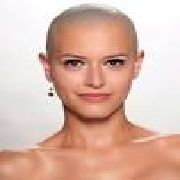

In [34]:
OUTLIER_PATH = 'OUTLIER.jpeg'
OUTLIER_IMG = tf.keras.preprocessing.image.load_img(OUTLIER_PATH, target_size=(img_height,img_width))

OUTLIER_ARRAY = tf.keras.utils.img_to_array(OUTLIER_IMG)
OUTLIER_ARRAY = tf.expand_dims(OUTLIER_ARRAY, 0)

OUTLIER_PREDICTION = model.predict(OUTLIER_ARRAY)
OUTLIER_SCORE = tf.nn.softmax(OUTLIER_PREDICTION)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(OUTLIER_SCORE)], 100 * np.max(OUTLIER_SCORE))
)
print('Correct Label: Woman')
OUTLIER_IMG

# CONVERTING TO TENSORFLOW LITE MODEL

In [41]:
tflite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open ('model.tflite', 'wb') as f:
    f.write(tflite_model)

NameError: name 'converter' is not defined

# DEBUGGING JOURNAL

There is no problem with these two code, however there is the limitation that 
 these code only works on the Google Collab envoirment. This is opposed to the code used in the project which works on any envoirment making it far more accessable.

In [ ]:
#dataset = tf.keras.utils.get_file("All-Age-Faces Dataset", url, untar=True, cache_dir='.',cache_subdir='',extract=True)
#dataset = tf.keras.utils.get_file(origin=url, extract=True, cache_dir='.',cache_subdir='')

Using an `tar.gz` archive presented problems due to the fact that the tensforflow libriares by default only extract once. This was fixed by switching to the recomended `.tgz` arhcive.